## Project 4   Hack-a-thon

### Max Bermont, Yunus Herman, Grant Hicks

### Problem Statement:

We have been tasked with creating a model that will predict if a person's income is greater than \\$50,000 given certain profile information. The information that we were given to create our model is from an extraction of data from the 1994 Census database. Since the client which hired us to create the model wants things to be as 'cost-efficient' as possible, they only provided us with a limited amount of data to create our model. We want to know if we can make a prediction if someone is likely to have an income of greater than \\$50,000 using the limited amount of data that we have at our disposal.

In [1]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

### Reading in the Data

In [2]:
# Reading in the dataframe as df

df = pd.read_csv('./data/cheap_train_sample.csv')

In [3]:
#read in test_data.csv
test = pd.read_csv('./data/test_data.csv')

In [4]:
# Checking come basic info, determining data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 712.5+ KB


We have 6,513 rows with 14 columns. So far it looks like there are no null values, but we will have to same some values to numerical values.

In [5]:
# Looking at description of numerical data

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#Changes representation of Unknown values.
df.replace(to_replace= ' ?', value='other', inplace=True)

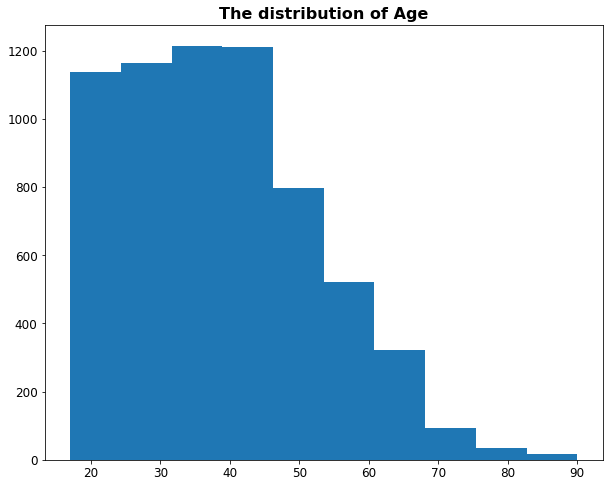

In [7]:
plt.figure(figsize = (10,8))
plt.hist(df['age']);
#sns.catplot(x ='age', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Age',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

<AxesSubplot:>

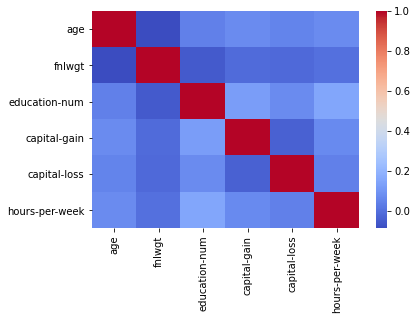

In [8]:
# Checking correlation heatmap for any standout correlations

sns.heatmap(df.corr(), cmap='coolwarm')

<Figure size 720x576 with 0 Axes>

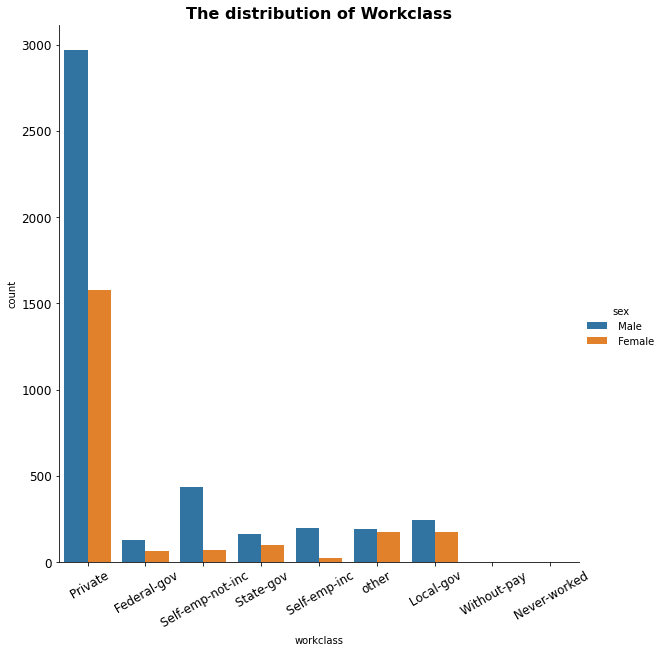

In [9]:
# clean object features to be numeric.
# a lot of features for a limited amount of unique data points.

df#%%

plt.figure(figsize = (10,8))
#plt.hist(df['workclass']);
sns.catplot(x ='workclass', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Workclass',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

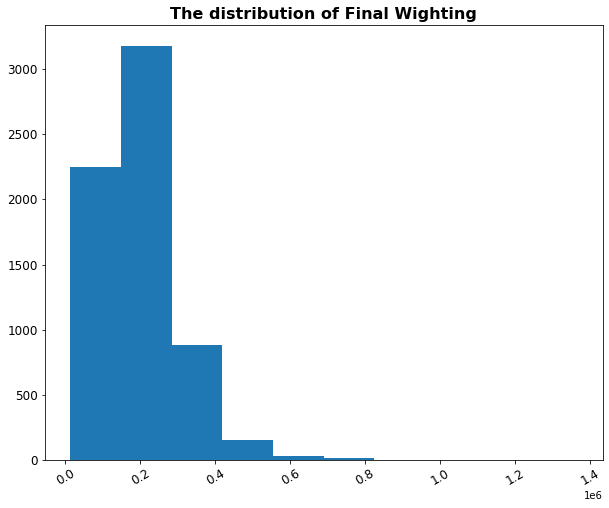

In [10]:
plt.figure(figsize = (10,8))
plt.hist(df['fnlwgt']);
#sns.catplot(x ='fnlwgt', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Final Wighting',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 1440x576 with 0 Axes>

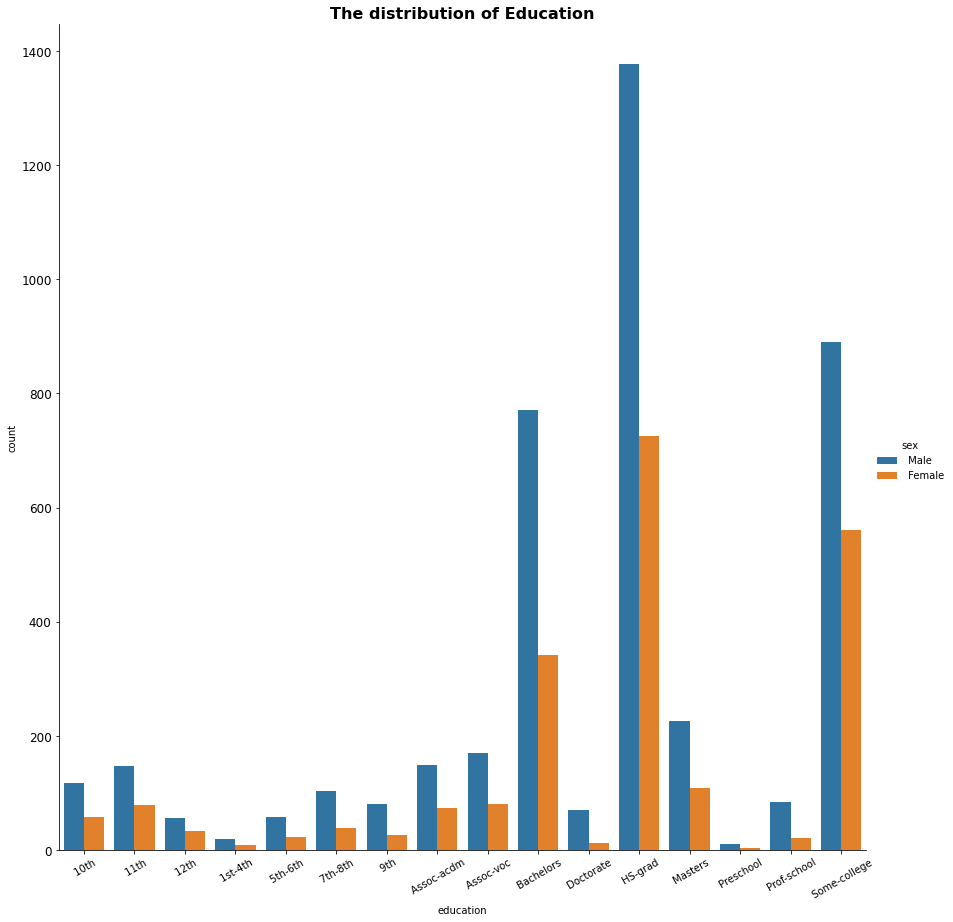

In [11]:
df_ed = df.sort_values(by = 'education')
plt.figure(figsize = (20,8))
#plt.hist(df['education']);
sns.catplot(x ='education', hue ='sex', kind ='count', data = df_ed, height = 12)
plt.title('The distribution of Education',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 720x576 with 0 Axes>

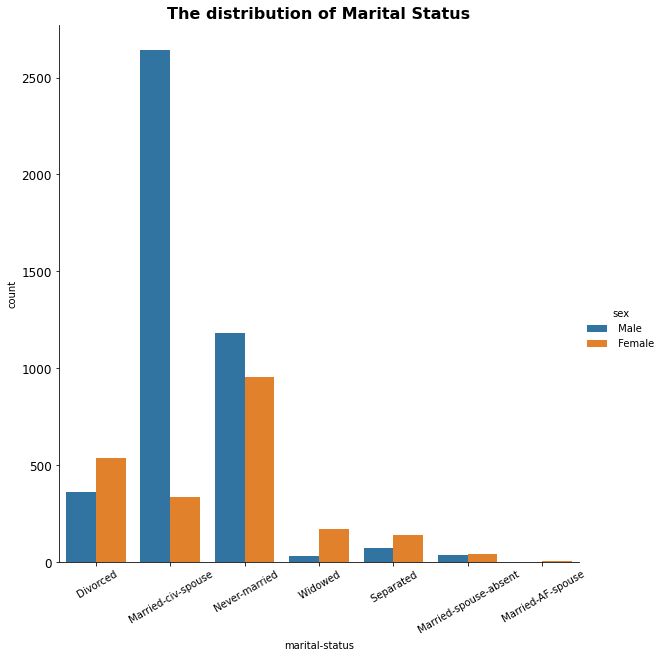

In [12]:
plt.figure(figsize = (10,8))
#plt.hist(df['marital-status'])
sns.catplot(x ='marital-status', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Marital Status',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 720x576 with 0 Axes>

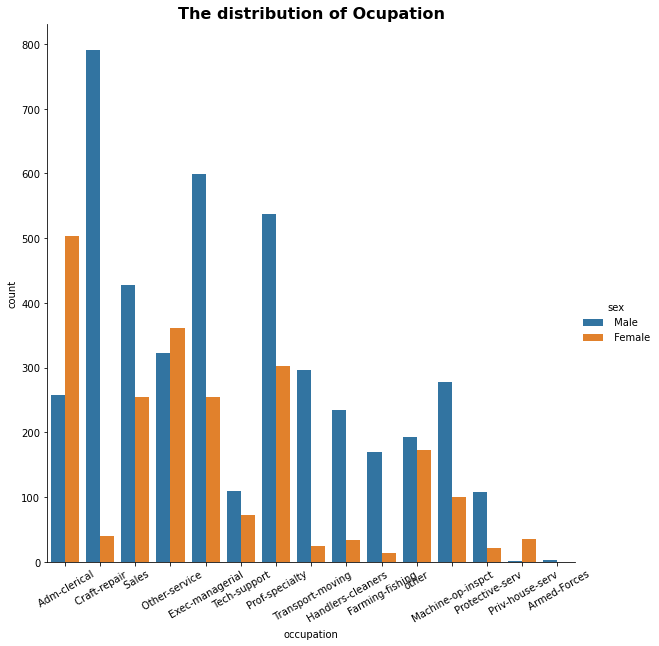

In [13]:
plt.figure(figsize = (10,8))
#plt.hist(df['occupation'])
sns.catplot(x ='occupation', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Ocupation',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

<Figure size 720x576 with 0 Axes>

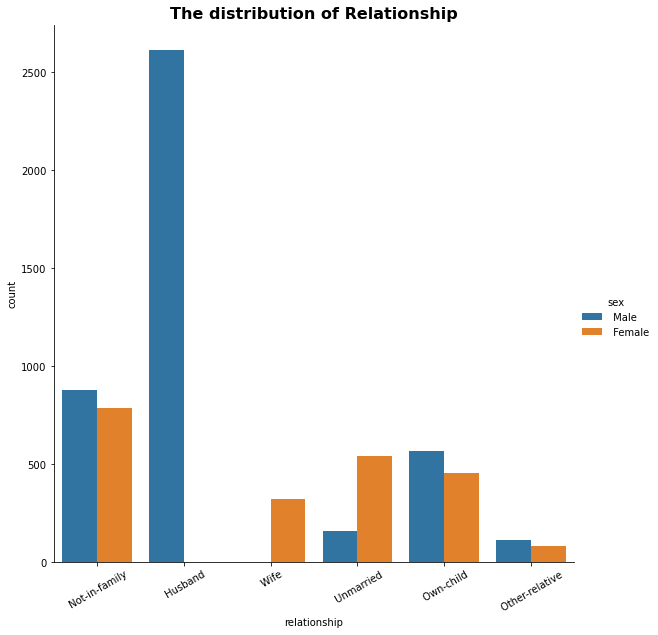

In [14]:
plt.figure(figsize = (10,8))
#plt.hist(df['relationship'])
sns.catplot(x ='relationship', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Relationship',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

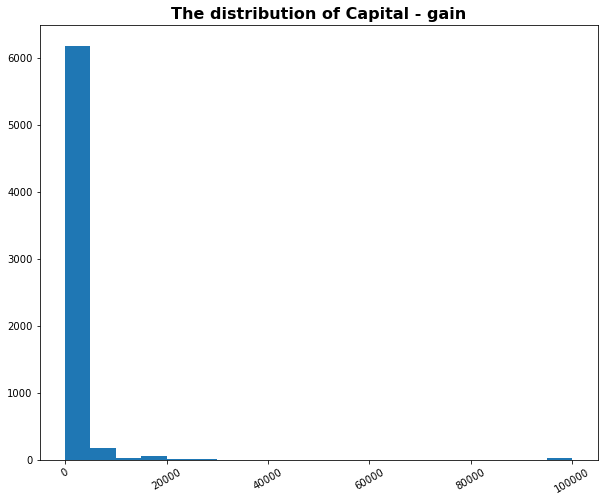

In [15]:
plt.figure(figsize = (10,8))
plt.hist(df['capital-gain'], bins = 20)
#sns.catplot(x ='capital-gain', hue ='sex', kind ='count', data = df, height = 8, bins = 20)
plt.title('The distribution of Capital - gain',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

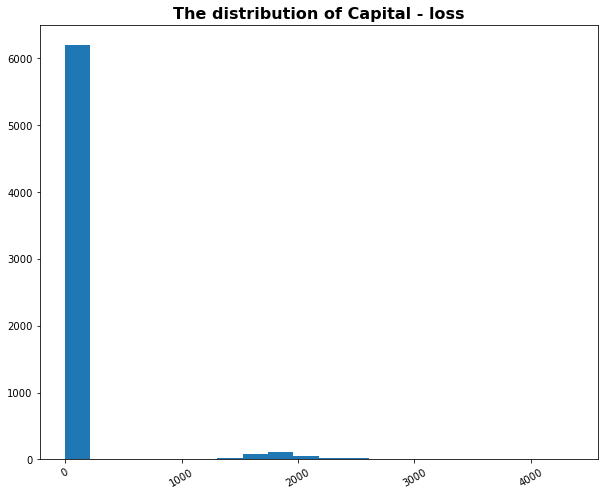

In [16]:
plt.figure(figsize = (10,8))
plt.hist(df['capital-loss'], bins = 20)
#sns.catplot(x ='capital-gain', hue ='sex', kind ='count', data = df, height = 8, bins = 20)
plt.title('The distribution of Capital - loss',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

## Preparing the Data


In [17]:
df = pd.get_dummies(df, columns=['occupation','relationship', 'sex', 'marital-status', 'workclass', 'native-country'],
                    drop_first=True)
test = pd.get_dummies(test, columns=['occupation','relationship', 'sex', 'marital-status', 'workclass', 'native-country'],
                    drop_first=True)
print(f'Number of Columns in Training data: ',len(df.columns))
print(f'NUmber of Columns in Testing data:  ', len(test.columns))
#note the columns are the same length and

Number of Columns in Training data:  82
NUmber of Columns in Testing data:   81


In [18]:
df.wage.value_counts()
#below or equal to 50k will be true.

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [19]:
# Creating our y-column

df['wage'] = [0 if wage == ' <=50K' else 1 for wage in df.wage]

In [20]:
df.wage.value_counts()

0    4945
1    1568
Name: wage, dtype: int64

In [21]:
# Splitting the data into our train and test sets, we are dropping the 'education' column as
# they also provied us with a numerical version of that column

X = df.drop(columns=['wage', 'education'])
features = X.columns
y = df['wage']

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=420)

In [22]:
#Baseline score

guess = [1 if pred == 1 else 0 for pred in y]
sum(guess)/len(guess)

0.24074927068939045

## Checking Models

#### Random Forest

In [23]:
rfc = RandomForestClassifier()

cross_val_score(rfc, X,y, cv=5).mean()

0.8453845727630789

#### SVC

In [24]:
svc = SVC()
cross_val_score(svc,X,y,cv= 5).mean()

0.7683099264016751

#### Ada boost

In [25]:
boost = AdaBoostClassifier()

cross_val_score(boost,X,y,cv=5).mean()

0.8559801144234089

#### Logistic Regression

In [26]:
logr= LogisticRegression()

cross_val_score(logr,X,y,cv=5).mean()

C:\Users\ghick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7950268375119216

#### Decision Tree

In [27]:
tree = DecisionTreeClassifier()

cross_val_score(tree, X,y,cv=5).mean()

0.7991717093838748

#### Extra Trees

In [28]:
x_trees = ExtraTreeClassifier()

cross_val_score(x_trees, X,y,cv= 5).mean()

0.7899581846453829

#### K-Nearest Neighbors

In [29]:
knn = KNeighborsClassifier()

cross_val_score(knn, X,y,cv= 5).mean()

0.7643179570246141

|         TEST        | Cross Val Score |
|:-------------------:|:---------------:|
| Random Forest       | 0.8477          |
| SVC                 | 0.7683          |
| Ada boost           | 0.8577          |
| Logistic Regression | 0.7926          |
| Decision Tree       | 0.8036          |
| Extra Trees         | 0.7887          |
| K-Nearest Neighbors | 0.7643          |
|                     |                 |

With these scores we decided to move forward using an ada boost model. We found it to have the best score while being the least overfit of the models that we ran.

### Setting up models with pipeline

We did some testing setting up a pipeline for our models to confrim that there was not something to tweak in another model that would get us a better score than the ada boost.

In [30]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

Training Score:  0.8673218673218673
Validation Score:  0.8158379373848987
[[1120  128]
 [ 172  209]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1248
           1       0.62      0.55      0.58       381

    accuracy                           0.82      1629
   macro avg       0.74      0.72      0.73      1629
weighted avg       0.81      0.82      0.81      1629



In [31]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))

Training Score:  0.8536036036036037
Validation Score:  0.8637200736648251


In [32]:
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[1167   81]
 [ 141  240]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1248
           1       0.75      0.63      0.68       381

    accuracy                           0.86      1629
   macro avg       0.82      0.78      0.80      1629
weighted avg       0.86      0.86      0.86      1629



Our ada boost still leaves us with the best score, and the fewest amount of false negaitves, which had been worrying us as the number of false negatives always seemed to be large compared to the total number of negatives.

### Adjusting paramaters with grid gearch

To further nail down how we can improve the model and perhaps get rid of some of those faslse negatives we looked to tune the parameters with a grid search.

In [35]:
boost = AdaBoostClassifier()
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values
df_feat = feat.sort_values(by= 'values', ascending=False).head(20)

,0,values
2,education-num,0.12
3,capital-gain,0.12
1,fnlwgt,0.12
0,age,0.10
5,hours-per-week,0.10
4,capital-loss,0.06
27,marital-status_ Married-civ-spouse,0.04
24,relationship_ Wife,0.02
21,relationship_ Other-relative,0.02
22,relationship_ Own-child,0.02


In [36]:
df_feat.columns = ['features','values']

In [37]:
df_feat

,features,values
2,education-num,0.12
3,capital-gain,0.12
1,fnlwgt,0.12
0,age,0.10
5,hours-per-week,0.10
4,capital-loss,0.06
27,marital-status_ Married-civ-spouse,0.04
24,relationship_ Wife,0.02
21,relationship_ Other-relative,0.02
22,relationship_ Own-child,0.02


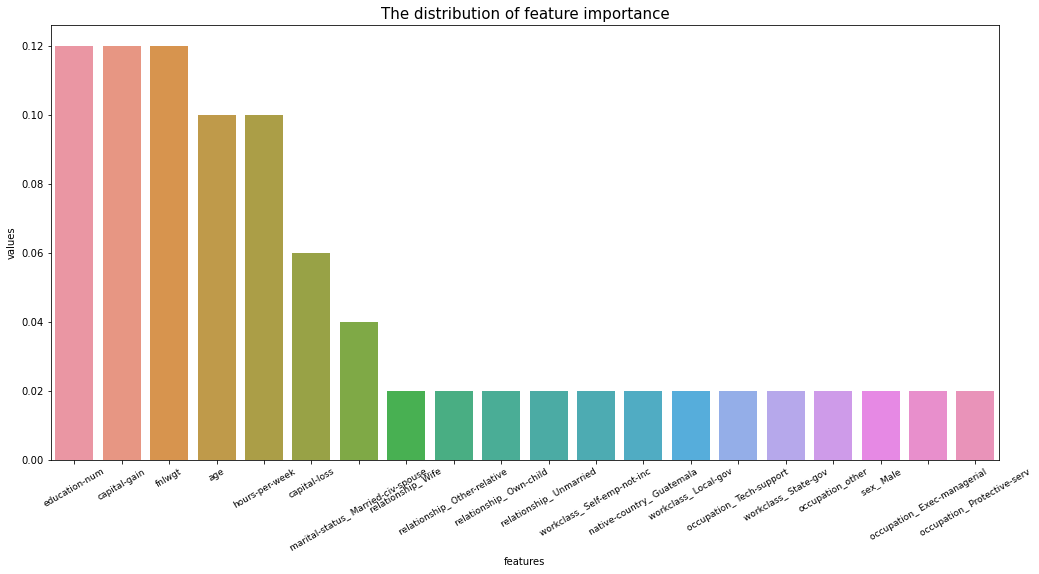

In [38]:
plt.figure(figsize = (17,8))
plt.title('The distribution of feature importance',fontsize = 15)
sns.barplot(x = 'features',y = 'values', data = df_feat)
#df_feat.plot(kind='bar')
plt.xticks(rotation = 30, fontsize = 9)
plt.yticks(rotation = 0, fontsize = 10);

In [32]:
#weight features and adjust hyperparameters.
#what if for feature with an importance below .1  we multiply the
estimators = np.random.randint(10,300,25)
params = dict(n_estimators= estimators)

grid = GridSearchCV(AdaBoostClassifier(), param_grid=params, n_jobs=-1, cv= 5, verbose= 1)
grid.fit(X_train,y_train)
print(f'Training Score: ', grid.score(X_train,y_train))
print(f'Validation Score: ', grid.score(X_val,y_val))
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Training Score:  0.8644553644553644
Validation Score:  0.8612645794966237
{'n_estimators': 136}
0.852170411262312


In [33]:
l_rate = [0.1291549665014884] #np.logspace(-2,-0.8,100)
estimators = [131] #np.random.randint(100,200,5)
criterion = ['mse'] #('friedman_mse', 'mse', 'mae')
max_features = [None] # [None, 'sqrt', 'log2']
params = dict(n_estimators= estimators,
              learning_rate= l_rate,
              criterion= criterion,
              max_features= max_features)

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, n_jobs=-1, cv= 5, verbose= 1)
grid.fit(X_train,y_train)
print(f'Training Score: ', grid.score(X_train,y_train))
print(f'Validation Score: ', grid.score(X_val,y_val))
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Training Score:  0.89004914004914
Validation Score:  0.8710865561694291
{'criterion': 'mse', 'learning_rate': 0.1291549665014884, 'max_features': None, 'n_estimators': 131}
0.8564703340772187


The grid search provided us with the best paramets to use with our gradient boost model.

In [34]:
best_params = grid.best_params_
#need to convert strings to
best_params = {key: [value] for key, value in best_params.items()}

### Making the Predictions

In [35]:
X_test = test.drop(columns=['education'])

test_grid = GridSearchCV(GradientBoostingClassifier(), param_grid= best_params, n_jobs=-1, cv=5, verbose= 1)
test_grid.fit(X,y)


pred = test_grid.predict(X_test)

submit = pd.DataFrame(pred, columns=['wage'])
submit.to_csv('submission.csv', index=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


## Conclusion


Our final models performs much better than the baseline with an accuracy of 87% on our testing data. We were able to put together a model with the data provided to us and tweak our features and parameters to create the best model that we could with the given data.